<a href="https://colab.research.google.com/github/nathanschoeck/Machine-Learning/blob/main/Kernels_in_Support_Vector_Machines_(SVMs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In machine learning, a kernel is a mathematical function used in algorithms, such as Support Vector Machines (SVMs), to enable operations in a high-dimensional feature space without explicitly calculating the coordinates of data points in that space. This is particularly useful for handling non-linear relationships in the data.

Key Concepts of Kernels:
1. Feature Space Transformation:
 - Kernels allow the data to be implicitly mapped to a higher-dimensional space where it becomes easier to find a linear decision boundary or separate the data.
 - This process is known as the kernel trick because the transformation is performed implicitly.

2. Kernel Function:
 - A kernel function computes the similarity between two data points in the transformed feature space without explicitly performing the transformation.

3. Why Use Kernels?:
 - When the data is not linearly separable in its original space, a kernel function can project the data into a higher-dimensional space where linear separation may be possible.

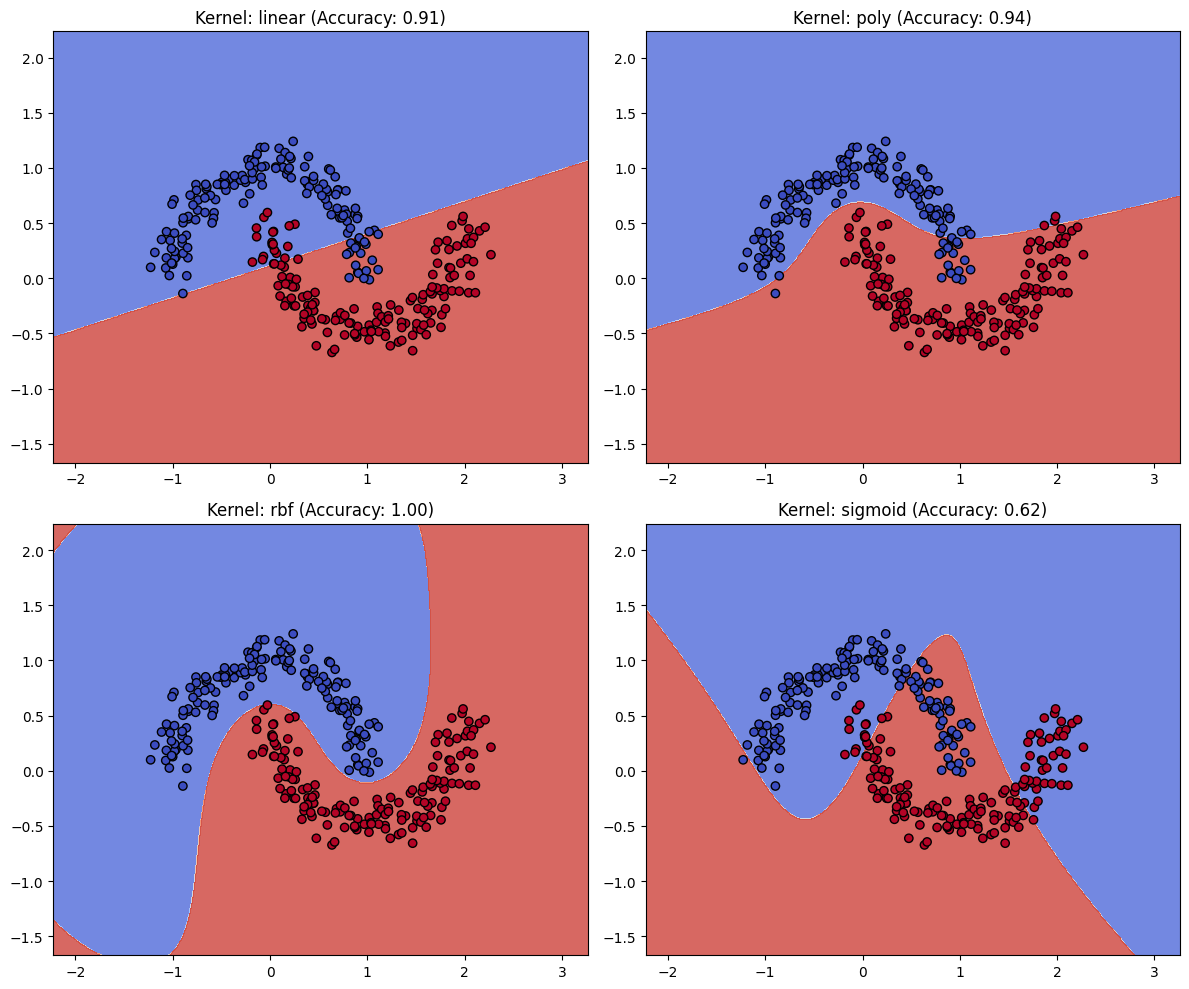

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define kernels to demonstrate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a figure for visualization
plt.figure(figsize=(12, 10))

for i, kernel in enumerate(kernels):
    # Train an SVM model with the specific kernel
    model = SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot the decision boundary
    plt.subplot(2, 2, i + 1)
    plt.title(f"Kernel: {kernel} (Accuracy: {accuracy:.2f})")

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.tight_layout()
plt.show()
